# Principal Component Analysis

In [597]:
import numpy as np
import pandas as pd
import matplotlib

link to data: https://www.kaggle.com/datasets/muthuj7/weather-dataset?resource=download

In [598]:
raw_data = pd.read_csv('data/weatherHistory.csv')
raw_data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [599]:
raw_data.shape

(96453, 12)

In [600]:
data = raw_data.drop(columns=['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary', 'Loud Cover'])
data.head(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
5,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66
6,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72
7,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [601]:
data_mean = data.mean(axis=0)
print(data_mean)

Temperature (C)               11.932678
Apparent Temperature (C)      10.855029
Humidity                       0.734899
Wind Speed (km/h)             10.810640
Wind Bearing (degrees)       187.509232
Visibility (km)               10.347325
Pressure (millibars)        1003.235956
dtype: float64


In [602]:
data_mean_centered = data - data_mean
data_mean_centered.head(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-2.460456,-3.466140,0.155101,3.30906,63.490768,5.478975,11.894044
1,-2.577123,-3.627251,0.125101,3.45396,71.490768,5.478975,12.394044
2,-2.554901,-1.477251,0.155101,-6.88224,16.490768,4.609575,12.704044
3,-3.643790,-4.910584,0.095101,3.29296,81.490768,5.478975,13.174044
4,-3.177123,-3.877251,0.095101,0.23396,71.490768,5.478975,13.274044
5,-2.710456,-3.743918,0.115101,3.14806,70.490768,4.609575,13.424044
6,-4.199345,-5.332807,0.215101,1.55416,71.490768,-0.365325,13.484044
7,-3.160456,-4.327251,0.155101,3.34126,72.490768,-0.365325,13.604044
8,-1.110456,-0.032807,0.085101,0.50766,71.490768,-0.365325,14.134044
9,1.839544,2.917193,-0.014899,1.71516,91.490768,-0.365325,13.984044


In [603]:
cov_mat = data_mean_centered.T.dot(data_mean_centered)
print(cov_mat.shape)
cov_mat.head(10)

(7, 7)


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),8.799512e+06,9.781996e+06,-113857.900549,5.704905e+04,2.966693e+06,1.517197e+06,-5.869822e+05
Apparent Temperature (C),9.781996e+06,1.103628e+07,-121523.833021,-4.040797e+05,3.216319e+06,1.650989e+06,-2.642925e+04
Humidity,-1.138579e+05,-1.215238e+05,3685.391540,-2.932167e+04,1.487347e+03,-2.917836e+04,1.202839e+04
Wind Speed (km/h),5.704905e+04,-4.040797e+05,-29321.668019,4.610161e+06,7.434269e+06,2.816370e+05,-3.842439e+06
Wind Bearing (degrees),2.966693e+06,3.216319e+06,1487.347470,7.434269e+06,1.112207e+09,2.066504e+06,-1.411502e+07
Visibility (km),1.517197e+06,1.650989e+06,-29178.355805,2.816370e+05,2.066504e+06,1.695037e+06,2.829138e+06
Pressure (millibars),-5.869822e+05,-2.642925e+04,12028.394740,-3.842439e+06,-1.411502e+07,2.829138e+06,1.319652e+09


#### Eigenvector with largest associated eigenvalue

In [604]:
data_mean_centered.std()

Temperature (C)               9.551546
Apparent Temperature (C)     10.696847
Humidity                      0.195473
Wind Speed (km/h)             6.913571
Wind Bearing (degrees)      107.383428
Visibility (km)               4.192123
Pressure (millibars)        116.969906
dtype: float64

In [605]:
data_normalized = data_mean_centered / data_mean_centered.std()
data_normalized.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-0.257598,-0.324034,0.793466,0.478633,0.591253,1.306969,0.101685
1,-0.269812,-0.339095,0.639992,0.499591,0.665752,1.306969,0.105959
2,-0.267486,-0.138102,0.793466,-0.995468,0.153569,1.099580,0.108610
3,-0.381487,-0.459068,0.486518,0.476304,0.758877,1.306969,0.112628
4,-0.332629,-0.362467,0.486518,0.033841,0.665752,1.306969,0.113483


In [606]:
cov_mat = data_normalized.T.dot(data_normalized) / (data.shape[0] - 1)
print(cov_mat.shape)
cov_mat.head(10)

(7, 7)


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [607]:
u, s, v = np.linalg.svd(data_normalized, full_matrices=False)
cov_mat_eigenvalues = np.square(s)
largest_cov_mat_ev_index = cov_mat_eigenvalues.argmax()
ev = v[largest_cov_mat_ev_index, :]
print(largest_cov_mat_ev_index)
print(ev)

0
[ 0.56905592  0.56082    -0.47980716  0.06823354  0.03233655  0.35453657
  0.00661246]


In [608]:
# What percentage of the variance does each eigenvector contain?
print(s)
variance_percentages = s / s.sum()
print(variance_percentages)

[515.84315629 333.66931091 312.04159373 301.85967719 263.31517128
 198.56125004  21.99906101]
[0.26490321 0.17135067 0.16024409 0.15501533 0.1352214  0.10196803
 0.01129727]


In [609]:
# You can use each of the principal components as a way of describing your data in one dimension:
principal_components = data.dot(v.T)
principal_components.head()

,0,1,2,3,4,5,6
0,30.510451,-103.677505,-1009.925752,-58.032269,-242.988130,-5.614595,-3.525464
1,30.639986,-99.540817,-1012.375148,-64.381975,-243.409874,-4.787809,-3.577916
2,29.054031,-136.237293,-998.208935,-24.765263,-240.144871,-7.194619,-2.333794
3,29.645206,-94.348708,-1015.716907,-72.199116,-243.530498,-3.013319,-3.762128
4,29.958849,-102.101035,-1013.058934,-65.676848,-242.743803,-3.392545,-3.464508


(964, 7)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

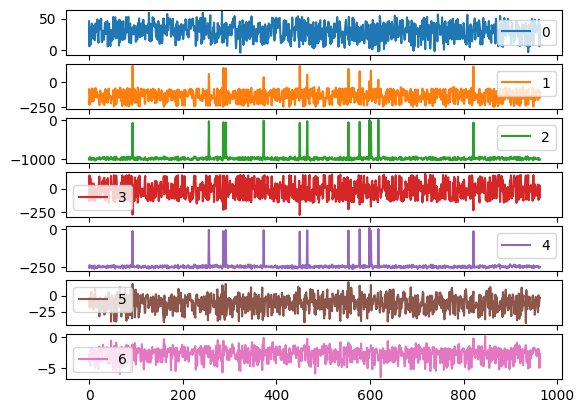

In [610]:
# Graphs are crowded, so maybe only plot a percentage of the points
num_samples = principal_components.shape[0]
sub_samples = int(0.01 * num_samples)
principal_comps_subset = principal_components.sample(n=sub_samples, axis=0).reset_index(drop=True)
print(principal_comps_subset.shape)
principal_comps_subset.plot(subplots=True)
# principal_components.plot(subplots=True)

Next let's see how well we can mark anomalies in our original by just using some of the principal components that we found.
We can implement the following algorithm:
1. Choose our principal components that we would like to use
2. Calculate anomalies for those PCs (we need just a 0 or 1 indicating if that point was an anomaly)
3. For each data point in our reduced dimension array, weight the point relative to the percentage of the variance that that PC explains.
4. If the weighted sum is greater than a certain threshold, consider that point an anomaly
We can then compare these anomalies to the type of weather from that day to see if they actually describe anything significant.

In [611]:
num_chosen_principal_components = 5
chosen_principal_components = principal_components.loc[:, :num_chosen_principal_components - 1]
chosen_principal_components.head()

,0,1,2,3,4
0,30.510451,-103.677505,-1009.925752,-58.032269,-242.988130
1,30.639986,-99.540817,-1012.375148,-64.381975,-243.409874
2,29.054031,-136.237293,-998.208935,-24.765263,-240.144871
3,29.645206,-94.348708,-1015.716907,-72.199116,-243.530498
4,29.958849,-102.101035,-1013.058934,-65.676848,-242.743803


In [612]:
# Let's choose our boundaries to be anything 2 standard deviations outside of the mean
chosen_principal_components_std = chosen_principal_components.std()
chosen_principal_components_mean = chosen_principal_components.mean()

min_boundary = chosen_principal_components_mean - 2 * chosen_principal_components_std
max_boundary = chosen_principal_components_mean + 2 * chosen_principal_components_std

cpc_mask = chosen_principal_components.mask(chosen_principal_components.le(min_boundary) | chosen_principal_components.ge(max_boundary))

# cpc_mask.isna().sum()
print(min_boundary)
print(max_boundary)

print(cpc_mask.isna().sum())

0       4.095444
1    -263.024948
2   -1204.969822
3    -189.046731
4    -299.039855
dtype: float64
0     55.162316
1    -11.947662
2   -757.767673
3    167.476869
4   -186.744537
dtype: float64
0    2890
1    1288
2    1288
3     507
4    1288
dtype: int64


In [613]:
anomalies = cpc_mask.isna()

In [614]:
weights = variance_percentages[:num_chosen_principal_components] / variance_percentages[:num_chosen_principal_components].sum()
print(weights)
scores = anomalies.dot(weights)

[0.29874009 0.19323781 0.18071256 0.17481591 0.15249364]


In [615]:
threshold = 0.8
anomaly_indices = scores[scores > threshold].index

In [616]:
anomaly_rows = raw_data.iloc[anomaly_indices]
anomaly_rows.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1620,2006-12-15 12:00:00.000 +0100,Foggy,snow,-1.111111,-1.111111,1.00,3.2200,130.0,0.1610,0.0,0.0,Foggy throughout the day.
2037,2006-12-30 21:00:00.000 +0100,Clear,snow,-2.777778,-7.716667,0.92,14.4900,140.0,4.9910,0.0,0.0,Foggy starting overnight continuing until morn...
2681,2006-02-27 17:00:00.000 +0100,Partly Cloudy,snow,-0.050000,-0.050000,0.69,4.6046,0.0,11.2700,0.0,0.0,Mostly cloudy starting overnight continuing un...
2687,2006-02-27 23:00:00.000 +0100,Clear,snow,-3.988889,-3.988889,0.92,4.6046,30.0,9.8049,0.0,0.0,Mostly cloudy starting overnight continuing un...
2688,2006-02-28 00:00:00.000 +0100,Clear,snow,-4.038889,-4.038889,0.92,4.8300,70.0,9.8049,0.0,0.0,Foggy overnight.


In [617]:
raw_data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [618]:
anomaly_rows.nunique()

Formatted Date              125
Summary                       6
Precip Type                   2
Temperature (C)              61
Apparent Temperature (C)    113
Humidity                     37
Wind Speed (km/h)            80
Wind Bearing (degrees)       60
Visibility (km)              48
Loud Cover                    1
Pressure (millibars)          1
Daily Summary                23
dtype: int64

In [619]:
print(raw_data["Summary"].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [620]:
anomaly_rows["Summary"].value_counts()

Clear            86
Foggy            23
Overcast          6
Breezy            6
Partly Cloudy     2
Mostly Cloudy     2
Name: Summary, dtype: int64

In [621]:
raw_data["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

Putting that all into one PCA function:

In [631]:
def PCA(data, k=None):
    if k == None:
        k = data.shape[1]

    data_mean = data.mean(axis=0)
    data_mean_centered = data - data_mean

    data_normalized = data_mean_centered / data_mean_centered.std()
    _, s, v = np.linalg.svd(data_normalized, full_matrices=False)
    cov_mat_eigenvalues = np.square(s)

    chosen_eigenvectors = v[:k, :].T

    principal_components = data.dot(chosen_eigenvectors)

    return principal_components, cov_mat_eigenvalues[:k], chosen_eigenvectors

In [632]:
from PIL import Image, ImageOps

img = Image.open("data/img/0.png")
img_greyscale = ImageOps.grayscale(img)

img_greyscale_np = np.array(img_greyscale)

In [639]:
principal_components, _, eigenvectors = PCA(img_greyscale_np, k=100)

reconstructed_img = Image.fromarray(principal_components.dot(eigenvectors.T))


In [640]:
reconstructed_img.show()